In [1]:
import pandas as pd
import numpy as np
import os
import env
from env import host, user, pwd
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt

import warnings
warnings.filterwarnings("ignore")



In [3]:
df = wrangle_zillow()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52315 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bed_rooms       52315 non-null  int64  
 1   bath_rooms      52315 non-null  float64
 2   finished_sqft   52315 non-null  float64
 3   tax_val         52315 non-null  float64
 4   year_built      52315 non-null  int64  
 5   regionidcounty  52315 non-null  int64  
 6   taxamount       52315 non-null  float64
 7   fips            52315 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 3.6 MB


In [5]:
df.head()

,bed_rooms,bath_rooms,finished_sqft,tax_val,year_built,regionidcounty,taxamount,fips
0,4,3.5,3100.0,1023282.0,1998,1286,11013.72,6059
1,2,1.0,1465.0,464000.0,1967,2061,5672.48,6111
2,3,2.0,1243.0,564778.0,1962,1286,6488.30,6059
3,4,3.0,2376.0,145143.0,1970,3101,1777.51,6037
4,4,3.0,2962.0,773303.0,1950,3101,9516.26,6037


In [6]:
train, validate, test = split_data(df)

In [7]:
train.head()

,bed_rooms,bath_rooms,finished_sqft,tax_val,year_built,regionidcounty,taxamount,fips
42782,2,1.0,614.0,150431.0,1923,3101,2863.70,6037
40761,4,2.0,1792.0,489350.0,1947,3101,5673.98,6037
2994,4,4.5,4052.0,990806.0,2004,1286,11679.74,6059
35637,4,4.0,4342.0,1617935.0,1957,3101,18950.81,6037
16821,4,3.5,3238.0,937000.0,1987,2061,10355.22,6111


In [10]:
from sklearn.linear_model import LinearRegression
# generate parameters, i.e. create model
# ols_model = LinearRegression().fit(df[['x']], df.y)

# compute predictions and add to original dataframe
# df['yhat'] = ols_model.predict(df[['x']])

# assuming X and y are already defined
model = LinearRegression().fit(x_train, y_train)
train['yhat'] = model.predict(x_train)

In [11]:
predictions = train['yhat']

In [12]:
train.head()

,bed_rooms,bath_rooms,finished_sqft,tax_val,year_built,regionidcounty,taxamount,fips,yhat
42782,2,1.0,614.0,150431.0,1923,3101,2863.70,6037,-7.897036e+04
40761,4,2.0,1792.0,489350.0,1947,3101,5673.98,6037,4.676900e+05
2994,4,4.5,4052.0,990806.0,2004,1286,11679.74,6059,1.516461e+06
35637,4,4.0,4342.0,1617935.0,1957,3101,18950.81,6037,1.651038e+06
16821,4,3.5,3238.0,937000.0,1987,2061,10355.22,6111,1.138718e+06


In [13]:
train['yhat_baseline'] = y_train.mean()

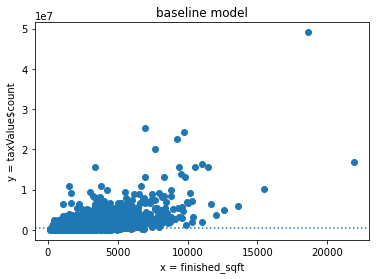

In [14]:
# plot data with baseline:
plt.scatter(x_train, y_train)
plt.axhline(y_train.mean(), ls=':')

plt.xlabel('x = finished_sqft')
plt.ylabel('y = taxValue$count')
plt.title('baseline model')
plt.show()

In [15]:
train['residual'] = y_train - train['yhat']
train['residual_baseline'] = y_train - train['yhat_baseline']

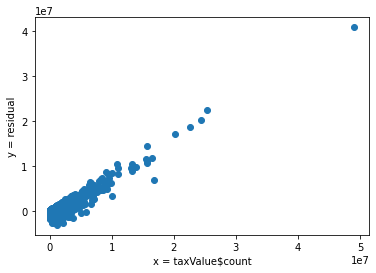

In [16]:
plt.scatter(y_train, train['residual'])
plt.xlabel('x = taxValue$count')
plt.ylabel('y = residual')
plt.show()

In [17]:
# square each residual value
train['residual^2'] = train.residual ** 2

train['residual_baseline^2'] = train.residual_baseline ** 2

In [18]:
train.head()

,bed_rooms,bath_rooms,finished_sqft,tax_val,year_built,regionidcounty,taxamount,fips,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
42782,2,1.0,614.0,150431.0,1923,3101,2863.70,6037,-7.897036e+04,528229.118788,229401.359970,-3.777981e+05,5.262498e+10,1.427314e+11
40761,4,2.0,1792.0,489350.0,1947,3101,5673.98,6037,4.676900e+05,528229.118788,21659.989649,-3.887912e+04,4.691552e+08,1.511586e+09
2994,4,4.5,4052.0,990806.0,2004,1286,11679.74,6059,1.516461e+06,528229.118788,-525655.179216,4.625769e+05,2.763134e+11,2.139774e+11
35637,4,4.0,4342.0,1617935.0,1957,3101,18950.81,6037,1.651038e+06,528229.118788,-33103.010619,1.089706e+06,1.095809e+09,1.187459e+12
16821,4,3.5,3238.0,937000.0,1987,2061,10355.22,6111,1.138718e+06,528229.118788,-201717.935209,4.087709e+05,4.069013e+10,1.670936e+11


In [19]:
# SSE
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  1.1653725533817264e+16
SSE - baseline =  1.804785891401278e+16


In [20]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  397792378953.34735
MSE baseline =  616051983684.2156


In [21]:
MSE2_baseline = mean_squared_error(y_train, train.yhat_baseline)
MSE2 = mean_squared_error(y_train, train.yhat)
print("MSE = ", MSE2)
print("MSE baseline = ", MSE2_baseline)

MSE =  397792378953.3475
MSE baseline =  616051983684.2174


In [22]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  630707.8396162104
RMSE baseline =  784889.7907886276


In [23]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric   model_error
0    SSE  1.165373e+16
1    MSE  3.977924e+11
2   RMSE  6.307078e+05
          metric   model_error
0   SSE_baseline  1.804786e+16
1   MSE_baseline  6.160520e+11
2  RMSE_baseline  7.848898e+05


In [24]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,1.165373e+16,-6.394133e+15
1,MSE,3.977924e+11,-2.182596e+11
2,RMSE,6.307078e+05,-1.541820e+05


In [25]:
TSS = SSE_baseline

In [26]:
ESS = TSS - SSE
ESS

6394133380195516.0

In [27]:
R2 = ESS/TSS
R2

0.35428764213304886

In [28]:
def good_model(SSE, SSE_baseline):
    if SSE < SSE_baseline:
        print('better than baseline')
    else:
        print('not better than baseline')

In [29]:
good_model(SSE, SSE_baseline)

better than baseline


#Viz
*plt.hist(y_train)
*plt.xlabel("Final Grade (G3)")
*plt.ylabel("Number of Students")
*plt.show()


see andrews git-hub py file

* Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. 
* Answer questions through charts and statistical tests.

* Construct a model to predict assessed home value for single family properties using regression techniques.

* Make recommendations to a data science team about how to improve predictions.

* Find the key drivers of property value for single family properties. 
* Some questions that come to mind are: 
* Why do some properties have a much higher value than others when they are located so close to each other? 
* Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location?
* Why do some properties have a much higher value in particular county? 
* 

Exploration should be refined in the report because now you know which visualizations and tests led to valuable outcomes.

Include at least 4 visualizations in the form of:

Question in markdown that you want to answer

Visualization

Statistical test (in at least 2 of your 4)

Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

Provide the context of the target variable through a visualization (distribution of the values, e.g.)

Include your 3 best models in the final notebook to review. Show the steps and code you went through to fit the models, evaluate, and select.

On your best model, a chart visualizing how it performed on test would be valuable

In [ ]:
observed = pd.crosstab(train.churn_encoded, train.contract_type)
observed

In [ ]:
stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

In [ ]:
${H_0}$: There is no **linear** relationship between tenure and monthly charges

${H_a}$: There is a **linear** relationship between tenure and monthly charges

In [ ]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [ ]:
alpha = 0.05

In [ ]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

In [ ]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

In [ ]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='internet_service_type', row='phone_service')

In [ ]:
# You could cram it all into one visual if you wanted to...
sns.relplot(data=df, y='monthly_charges', x='tenure', hue='internet_service_type', style='phone_service')

In [ ]:
Check on the order below

In [ ]:
def select_kbest(X_train, y_train):
    kbest = SelectKBest(f_regression, k=3)
    _ = kbest.fit(X_train, y_train)
    kbest_results = pd.DataFrame(
        dict(p=kbest.pvalues_, f=kbest.scores_),
                                 index = X_train.columns)
    return kbest_results

In [ ]:
# get-support() will output a boolean mask to tell me which features were selected
# we can apply this mask to the columns in our original dataframe
X_train.columns[kbest.get_support()]

In [ ]:
# kbest transform will convert our information to the selected feature subspace
# its a numpy array
kbest.transform(X_train)[:5]

In [ ]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    columns=X_train.columns[kbest.get_support()],
    index=X_train.index
)

In [ ]:
X_train_transformed.head(10)

In [2]:
x_1 = train[['finished_sqft']]
y_1 = train.taxvaluedollarcnt

NameError: name 'train' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_1, y_1)


plt.xticks(fontsize=18, fontweight = 'bold')
plt.yticks(np.arrange(0,500,1000),np.arrange(0,500,1000), fontsize= 18)

ax= plt.axes()
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.tick_params(axis='y', which='major', length=8, width='2')
plt.tick_params(axis='y', which='minor', length=8, width='2')

plt.tick_params(axis='x', which='major', length=8, width='2')
plt.tick_params(axis='x', which='minor', length=8, width='2')


plt.xlabel('x = finished_sqft', fontsize=15, fontweight = 'bold')
plt.ylabel('y = price $', fontsize=15, fontweight = 'bold')
plt.title('price vs sqft', fontsize=16, fontweight = 'bold')
plt.savefig('plot.png')

In [ ]:
### Evaluate

**Plotting Actual vs. Predicted Values**

In [3]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.urea, y_validate.urea_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.plot(y_validate.urea, y_validate.urea, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.urea, y_validate.urea_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.urea, y_validate.urea_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.urea, y_validate.urea_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual urea Concentration")
plt.ylabel("Predicted Urea Concentration")
plt.title("Where are predictions more extreme? More modest?")

plt.show()

NameError: name 'y_validate' is not defined

<Figure size 1152x576 with 0 Axes>